# Ejercicio Práctico de Pandas

In [42]:
import os
os.environ['PYARROW_IGNORE_TIMEZONE'] = '1'

import findspark
findspark.init()

import pandas as pd
import pyspark
from pyspark.sql import SparkSession

In [9]:
import numpy as np
import pandas as pd
import pyspark.pandas as ps

### Funciones básicas

In [10]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de pandas con [1, 3, 5, np.nan, 6, 8]

kser = ps.Series(pser)

## Pasa la serie de pandas pser a pandas con el nombre de kser

In [11]:
## Ordena kser por el index
kser = ps.DataFrame(pser, index = [1,2,3,4,5], columns= ['Conjunto'])
kser

,Conjunto
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [12]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
## Genera un Dataframe de pandas con el pdf de pandas y llamalo kdf
kdf = ps.from_pandas(pdf)

### Visualización de datos

In [13]:
## Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.475731,0.467694
std,0.254836,0.364168
min,0.268114,0.044083
25%,0.302312,0.199565
50%,0.367626,0.538103
75%,0.554059,0.576925
max,0.886541,0.979794


In [14]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by = 'B', ascending= True)

,A,B
4,0.886541,0.044083
2,0.268114,0.199565
0,0.302312,0.538103
1,0.554059,0.576925
3,0.367626,0.979794


In [15]:
## Transpon los datos de kdf
kdf.transpose()

,0,1,2,3,4
A,0.302312,0.554059,0.268114,0.367626,0.886541
B,0.538103,0.576925,0.199565,0.979794,0.044083


### Selección

In [16]:
## Selecciona las varaibles A y B de Kdf
selected_columns = kdf[['A', 'B']]
selected_columns

,A,B
0,0.302312,0.538103
1,0.554059,0.576925
2,0.268114,0.199565
3,0.367626,0.979794
4,0.886541,0.044083


In [17]:
## Selecciona las filas 1, 2 de kdf
selected_columns = kdf[['A', 'B']]

In [18]:
## Selecciona las filas 0, 1 y 2 de la variable B
result = kdf.loc[[0,1, 2], 'B']
result

0    0.538103
1    0.576925
2    0.199565
Name: B, dtype: float64

### Aplicando funciones de Python a Pandas

In [19]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf['B'].cumsum()

0    0.538103
1    1.115028
2    1.314594
3    2.294388
4    2.338471
Name: B, dtype: float64

In [26]:
## Eleva al cuadrado los valores de kdf
kdf_squared = kdf ** 2
print(kdf_squared)

          A         B
0  0.091393  0.289555
1  0.306982  0.332843
2  0.071885  0.039826
3  0.135149  0.959996
4  0.785956  0.001943


### Agrupando datos

In [31]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\groupby.py:893: FutureWarning: Default value of `numeric_only` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


,
A,B
0.302312,0.538103
0.554059,0.576925
0.268114,0.199565
0.886541,0.044083
0.367626,0.979794


### Generando gráficos

In [22]:
# This is needed for visualizing plot on notebook
%matplotlib inline

C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\plot\matplotlib.py:859: FutureWarning: Argument `sort_columns` will be removed in 4.0.0.
  warnings.warn(


AttributeError: Rectangle.set() got an unexpected keyword argument 'sort_columns'

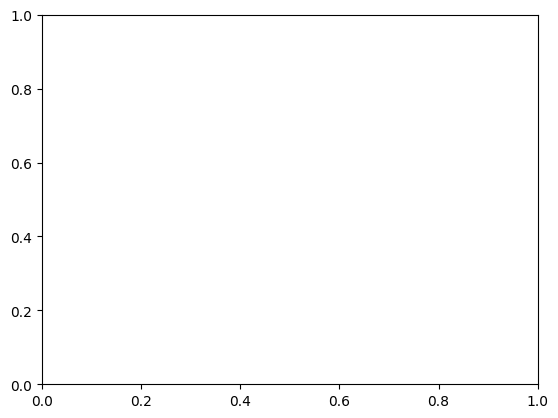

In [36]:
# Sample data
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']

# Create the pandas-on-Spark DataFrame
kdf = ps.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)

# Set Matplotlib as the plotting backend
ps.options.plotting.backend = "matplotlib"

# Generate a bar plot
kdf.plot(kind='bar')

# Show the plot
plt.show()


In [38]:
kdf = ps.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

### Utilizando SQL en Pamdas

In [57]:
# Initialize Spark session
spark = SparkSession.builder.appName("SQLQuery").getOrCreate()

# Create the pandas-on-Spark DataFrame
kdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

# Convert pandas-on-Spark DataFrame to a Spark DataFrame
spark_df = kdf.to_spark()

# Register the Spark DataFrame as a temporary SQL table
spark_df.createOrReplaceTempView("animal_data")

# Run SQL query to select rows where 'pig' is greater than 100
result = spark.sql("SELECT * FROM animal_data WHERE pig > 100")

# Show the result
result.show()

C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+----+----+-----+
|year| pig|horse|
+----+----+-----+
|2003| 489|  281|
|2009| 675|  600|
|2014|1776| 1900|
+----+----+-----+



In [58]:
pdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [63]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken
# Perform an inner join on 'year' column

joined_df = kdf.merge(pdf, on='year', how='inner')
sorted_df = joined_df.sort_values(by=['pig', 'chicken'])

sorted_df

,year,pig,horse,sheep,chicken
1,1997,18,25,50,326
0,1990,20,4,22,250
2,2003,489,281,121,589
3,2009,675,600,445,1241
4,2014,1776,1900,791,2118


### Trabajando con PySpark

In [48]:
# Create the pandas-on-Spark DataFrame
kdf = ps.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

# Convert the pandas-on-Spark DataFrame to a Spark DataFrame
spark_df = kdf.to_spark()

# Check the type of the Spark DataFrame
print(type(spark_df))
spark_df

<class 'pyspark.sql.dataframe.DataFrame'>


C:\Users\HP\anaconda3\envs\Process_Big_Data\lib\site-packages\pyspark\pandas\utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


DataFrame[A: bigint, B: bigint]